In [3]:
import ScraperFC as sfc
import traceback


link = 'https://fbref.com/en/matches/e81453d3/Liverpool-Real-Madrid-May-28-2022-Champions-League'

In [4]:
scraper = sfc.FBRef()
try:
    match = scraper.scrape_match(link=link)
except:
    traceback.print_exc()
finally:
    scraper.close()

In [4]:
match.columns

Index(['Link', 'Date', 'Stage', 'Home Team', 'Away Team', 'Home Team ID',
       'Away Team ID', 'Home Formation', 'Away Formation', 'Home Goals',
       'Away Goals', 'Home Ast', 'Away Ast', 'Home xG', 'Away xG', 'Home npxG',
       'Away npxG', 'Home xAG', 'Away xAG', 'Home Player Stats',
       'Away Player Stats', 'Shots'],
      dtype='object')

In [8]:
print(match['Home npxG'])
print(match['Away npxG'])

0    2.2
Name: Home npxG, dtype: object
0    0.9
Name: Away npxG, dtype: object


In [51]:
print(match['Shots'][0].Home[0].shape)
print(match['Shots'][0].Home[0])

(24, 14)
   Unnamed: 0_level_0      Unnamed: 1_level_0 Unnamed: 2_level_0  \
               Minute                  Player              Squad   
0                16.0           Mohamed Salah          Liverpool   
1                16.0               Luis Díaz          Liverpool   
2                16.0        Thiago Alcántara          Liverpool   
3                17.0           Mohamed Salah          Liverpool   
4                19.0  Trent Alexander-Arnold          Liverpool   
5                21.0              Sadio Mané          Liverpool   
6                28.0                 Fabinho          Liverpool   
7                34.0           Mohamed Salah          Liverpool   
8                40.0              Sadio Mané          Liverpool   
9                41.0        Jordan Henderson          Liverpool   
11               54.0              Sadio Mané          Liverpool   
12               54.0  Trent Alexander-Arnold          Liverpool   
13               58.0           Mohamed

In [24]:
print(match['Shots'][0].Away[0].shape)

(4, 13)


In [31]:
print((match['Shots'][0].Both[0].columns))

MultiIndex([('Unnamed: 0_level_0',    'Minute'),
            ('Unnamed: 1_level_0',    'Player'),
            ('Unnamed: 2_level_0',     'Squad'),
            ('Unnamed: 3_level_0',        'xG'),
            ('Unnamed: 4_level_0',      'PSxG'),
            ('Unnamed: 5_level_0',   'Outcome'),
            ('Unnamed: 6_level_0',  'Distance'),
            ('Unnamed: 7_level_0', 'Body Part'),
            ('Unnamed: 8_level_0',     'Notes'),
            (             'SCA 1',    'Player'),
            (             'SCA 1',     'Event'),
            (             'SCA 2',    'Player'),
            (             'SCA 2',     'Event')],
           )


In [40]:
match['Shots'][0].Both[0]['Unnamed: 0_level_0','Minute'] = match['Shots'][0].Both[0]['Unnamed: 0_level_0','Minute'].replace('90+2', 92)
print((match['Shots'][0].Both[0]['Unnamed: 0_level_0','Minute']))
match['Shots'][0].Away[0]['Unnamed: 0_level_0','Minute'] = match['Shots'][0].Away[0]['Unnamed: 0_level_0','Minute'].replace('90+2', 92)
print((match['Shots'][0].Away[0]['Unnamed: 0_level_0','Minute']))

0     16
1     16
2     16
3     17
4     19
5     21
6     28
7     34
8     40
9     41
10    43
12    54
13    54
14    58
15    58
16    59
17    59
18    64
19    69
20    69
21    74
22    74
23    79
24    80
25    80
26    81
27    82
28    92
Name: (Unnamed: 0_level_0, Minute), dtype: object
0    43
2    59
3    59
4    92
Name: (Unnamed: 0_level_0, Minute), dtype: object


In [35]:
print((match['Shots'][0].Both[0]['Unnamed: 3_level_0','xG']))

0     0.29
1     0.07
2     0.04
3     0.09
4     0.05
5     0.06
6     0.03
7     0.04
8     0.13
9     0.01
10    0.10
12    0.04
13    0.05
14    0.10
15    0.12
16    0.06
17    0.70
18    0.04
19    0.02
20    0.13
21    0.04
22    0.15
23    0.03
24    0.05
25    0.29
26    0.16
27    0.16
28    0.06
Name: (Unnamed: 3_level_0, xG), dtype: float64


In [83]:
len(match['Shots'][0].Home[0])

24

In [123]:
import pandas as pd
import numpy as np
import random


def simulate_shots():
    home_num_of_shots = (len(match['Shots'][0].Home[0]))
    away_num_of_shots = (len(match['Shots'][0].Away[0]))
    match['Shots'][0].Home[0]['generated'] = np.random.rand()
    match['Shots'][0].Home[0]['simulate'] = (np.random.rand(home_num_of_shots) < match['Shots'][0].Home[0]['Unnamed: 3_level_0','xG'])
    # print(match['Shots'][0].Home[0]['simulate'])
    home_goals = len(match['Shots'][0].Home[0][match['Shots'][0].Home[0]['simulate'] == True])

    match['Shots'][0].Away[0]['generated'] = np.random.rand()
    match['Shots'][0].Away[0]['simulate'] = (np.random.rand(away_num_of_shots) < match['Shots'][0].Away[0]['Unnamed: 3_level_0','xG'])
    # print(match['Shots'][0].Away[0]['simulate'])
    away_goals = len(match['Shots'][0].Away[0][match['Shots'][0].Away[0]['simulate'] == True])
    # print(f'LIV {home_goals} - {away_goals} RMD')
    return (home_goals, away_goals)

def simulation_loop(simulation_volume = 1000):
    home_win = 0
    away_win = 0
    for _ in range (simulation_volume):
        (a, b) = simulate_shots()
        if (a > b):
            home_win += 1
        elif (a < b):
            away_win += 1
    return(home_win/simulation_volume, away_win/simulation_volume)

a, b = simulation_loop(1000000)
print(f'home prob = {round(a*100)}%, away prob = {round(b*100)}%')
    

home prob = 68%, away prob = 11%


In [73]:
import pandas as pd
import numpy as np
import random

df = {
    'a': [0.4, 0.5],
}

df = pd.DataFrame(df)
df['b'] = np.random.rand(2)
df

,a,b
0,0.4,0.459252
1,0.5,0.709890


In [31]:
match['Home Player Stats'][0]['Passing'][0].columns

MultiIndex([( 'Unnamed: 0_level_0',  'Player'),
            ( 'Unnamed: 1_level_0',       '#'),
            ( 'Unnamed: 2_level_0',  'Nation'),
            ( 'Unnamed: 3_level_0',     'Pos'),
            ( 'Unnamed: 4_level_0',     'Age'),
            ( 'Unnamed: 5_level_0',     'Min'),
            (              'Total',     'Cmp'),
            (              'Total',     'Att'),
            (              'Total',    'Cmp%'),
            (              'Total', 'TotDist'),
            (              'Total', 'PrgDist'),
            (              'Short',     'Cmp'),
            (              'Short',     'Att'),
            (              'Short',    'Cmp%'),
            (             'Medium',     'Cmp'),
            (             'Medium',     'Att'),
            (             'Medium',    'Cmp%'),
            (               'Long',     'Cmp'),
            (               'Long',     'Att'),
            (               'Long',    'Cmp%'),
            ('Unnamed: 20_level_0',     

In [28]:
print(type(match['Home Player Stats'][0]))
# match['Home Player Stats'][0]['Passing'][0].columns 
# match['Home Player Stats'][0]['Summary'][0].columns 
print((match['Home Player Stats'][0]['Passing'][0]['Unnamed: 27_level_0','PrgP']))

<class 'pandas.core.frame.DataFrame'>
0      9
1      1
2      2
3      2
4     19
5      0
6      9
7     10
8      4
9      7
10     3
11     6
12    12
13     0
14    84
Name: (Unnamed: 27_level_0, PrgP), dtype: int64


In [50]:
# match['Home Player Stats'][0]['Passing'][0].drop(index=[14], inplace=True)
match['Home Player Stats'][0]['Possession'][0].drop(index=[14], inplace=True)

In [51]:
df_home_PrgP = (match['Home Player Stats'][0]['Passing'][0].drop(match['Home Player Stats'][0]['Passing'][0].columns.difference([['Unnamed: 27_level_0','PrgP']]), 1))
# df_home_PrgP = (match['Home Player Stats'][0]['Passing'][0].drop(match['Home Player Stats'][0]['Passing'][0].columns.difference([['Unnamed: 27_level_0','PrgP']]), 1))
# df_away_PrgP = (match['Away Player Stats'][0]['Passing'][0].drop(match['Away Player Stats'][0]['Passing'][0].columns.difference([['Unnamed: 27_level_0','PrgP']]), 1))
df_home_PrgP

/tmp/ipykernel_453564/1972580157.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_home_PrgP = (match['Home Player Stats'][0]['Passing'][0].drop(match['Home Player Stats'][0]['Passing'][0].columns.difference([['Unnamed: 27_level_0','PrgP']]), 1))


,Unnamed: 27_level_0
,PrgP
0,9
1,1
2,2
3,2
4,19
5,0
6,9
7,10
8,4


In [40]:
match['Home Player Stats'][0].columns

Index(['Team Sheet', 'Summary', 'GK', 'Passing', 'Pass Types', 'Defense',
       'Possession', 'Misc'],
      dtype='object')

In [42]:
match['Home Player Stats'][0]['Possession'][0].columns

MultiIndex([('Unnamed: 0_level_0',  'Player'),
            ('Unnamed: 1_level_0',       '#'),
            ('Unnamed: 2_level_0',  'Nation'),
            ('Unnamed: 3_level_0',     'Pos'),
            ('Unnamed: 4_level_0',     'Age'),
            ('Unnamed: 5_level_0',     'Min'),
            (           'Touches', 'Touches'),
            (           'Touches', 'Def Pen'),
            (           'Touches', 'Def 3rd'),
            (           'Touches', 'Mid 3rd'),
            (           'Touches', 'Att 3rd'),
            (           'Touches', 'Att Pen'),
            (           'Touches',    'Live'),
            (          'Take-Ons',     'Att'),
            (          'Take-Ons',    'Succ'),
            (          'Take-Ons',   'Succ%'),
            (          'Take-Ons',    'Tkld'),
            (          'Take-Ons',   'Tkld%'),
            (           'Carries', 'Carries'),
            (           'Carries', 'TotDist'),
            (           'Carries', 'PrgDist'),
            (

In [52]:
df_home_PrgCD = (match['Home Player Stats'][0]['Possession'][0].drop(match['Home Player Stats'][0]['Possession'][0].columns.difference([['Carries', 'PrgDist']]), 1))
# df_home_PrgP = (match['Home Player Stats'][0]['Passing'][0].drop(match['Home Player Stats'][0]['Passing'][0].columns.difference([['Unnamed: 27_level_0','PrgP']]), 1))
# df_away_PrgP = (match['Away Player Stats'][0]['Passing'][0].drop(match['Away Player Stats'][0]['Passing'][0].columns.difference([['Unnamed: 27_level_0','PrgP']]), 1))
df_home_PrgCD

/tmp/ipykernel_453564/3769736157.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_home_PrgCD = (match['Home Player Stats'][0]['Possession'][0].drop(match['Home Player Stats'][0]['Possession'][0].columns.difference([['Carries', 'PrgDist']]), 1))


,Carries
,PrgDist
0,127
1,74
2,74
3,119
4,107
5,21
6,199
7,116
8,59


In [83]:
df_home_team = (match['Home Player Stats'][0]['Possession'][0].drop(match['Home Player Stats'][0]['Possession'][0].columns.difference([[ 'Unnamed: 0_level_0',	'Player']]), 1))
df_home_team 

/tmp/ipykernel_453564/2384657533.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_home_team = (match['Home Player Stats'][0]['Possession'][0].drop(match['Home Player Stats'][0]['Possession'][0].columns.difference([[ 'Unnamed: 0_level_0',	'Player']]), 1))


,Unnamed: 0_level_0
,Player
0,Sadio Mané
1,Luis Díaz
2,Diogo Jota
3,Mohamed Salah
4,Thiago Alcántara
5,Roberto Firmino
6,Fabinho
7,Jordan Henderson
8,Naby Keïta


In [89]:
import pandas as pd
import numpy as np

df_home_team.columns = ['name']
(df_home_team).to_csv('df_home_team.csv', index=0)
df_home_team = pd.read_csv('df_home_team.csv')
df_home_team.values.shape

(14, 1)

In [154]:
home_prg_df = pd.DataFrame({
    'name': list(df_home_team.values),
    'progressive pass': list(df_home_PrgP.values),
    'progressive carry distance': list(df_home_PrgCD.values),
    # 'color': np.full(14, ['red'])
})
home_prg_df = home_prg_df.apply(np.vectorize(lambda x: x[0]))
home_prg_df['Team'] = 'Liverpool'

home_prg_df

,name,progressive pass,progressive carry distance,Team
0,Sadio Mané,9,127,Liverpool
1,Luis Díaz,1,74,Liverpool
2,Diogo Jota,2,74,Liverpool
3,Mohamed Salah,2,119,Liverpool
4,Thiago Alcántara,19,107,Liverpool
5,Roberto Firmino,0,21,Liverpool
6,Fabinho,9,199,Liverpool
7,Jordan Henderson,10,116,Liverpool
8,Naby Keïta,4,59,Liverpool
9,Andrew Robertson,7,130,Liverpool


In [110]:
# match['Away Player Stats'][0]['Possession'][0].drop(index=[14], inplace=True)
match['Away Player Stats'][0]['Passing'][0].drop(index=[14], inplace=True)

In [111]:
df_away_PrgP = (match['Away Player Stats'][0]['Passing'][0].drop(match['Away Player Stats'][0]['Passing'][0].columns.difference([['Unnamed: 27_level_0','PrgP']]), 1))
# df_home_PrgP = (match['Home Player Stats'][0]['Passing'][0].drop(match['Home Player Stats'][0]['Passing'][0].columns.difference([['Unnamed: 27_level_0','PrgP']]), 1))
# df_away_PrgP = (match['Away Player Stats'][0]['Passing'][0].drop(match['Away Player Stats'][0]['Passing'][0].columns.difference([['Unnamed: 27_level_0','PrgP']]), 1))
df_away_PrgP

/tmp/ipykernel_453564/3229876529.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_away_PrgP = (match['Away Player Stats'][0]['Passing'][0].drop(match['Away Player Stats'][0]['Passing'][0].columns.difference([['Unnamed: 27_level_0','PrgP']]), 1))


,Unnamed: 27_level_0
,PrgP
0,2
1,1
2,0
3,3
4,0
5,4
6,2
7,3
8,0


In [112]:
match['Away Player Stats'][0].columns

Index(['Team Sheet', 'Summary', 'GK', 'Passing', 'Pass Types', 'Defense',
       'Possession', 'Misc'],
      dtype='object')

In [113]:
match['Away Player Stats'][0]['Possession'][0].columns

MultiIndex([('Unnamed: 0_level_0',  'Player'),
            ('Unnamed: 1_level_0',       '#'),
            ('Unnamed: 2_level_0',  'Nation'),
            ('Unnamed: 3_level_0',     'Pos'),
            ('Unnamed: 4_level_0',     'Age'),
            ('Unnamed: 5_level_0',     'Min'),
            (           'Touches', 'Touches'),
            (           'Touches', 'Def Pen'),
            (           'Touches', 'Def 3rd'),
            (           'Touches', 'Mid 3rd'),
            (           'Touches', 'Att 3rd'),
            (           'Touches', 'Att Pen'),
            (           'Touches',    'Live'),
            (          'Take-Ons',     'Att'),
            (          'Take-Ons',    'Succ'),
            (          'Take-Ons',   'Succ%'),
            (          'Take-Ons',    'Tkld'),
            (          'Take-Ons',   'Tkld%'),
            (           'Carries', 'Carries'),
            (           'Carries', 'TotDist'),
            (           'Carries', 'PrgDist'),
            (

In [114]:
df_away_PrgCD = (match['Away Player Stats'][0]['Possession'][0].drop(match['Away Player Stats'][0]['Possession'][0].columns.difference([['Carries', 'PrgDist']]), 1))
# df_home_PrgP = (match['Home Player Stats'][0]['Passing'][0].drop(match['Home Player Stats'][0]['Passing'][0].columns.difference([['Unnamed: 27_level_0','PrgP']]), 1))
# df_away_PrgP = (match['Away Player Stats'][0]['Passing'][0].drop(match['Away Player Stats'][0]['Passing'][0].columns.difference([['Unnamed: 27_level_0','PrgP']]), 1))
df_away_PrgCD

/tmp/ipykernel_453564/745886819.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_away_PrgCD = (match['Away Player Stats'][0]['Possession'][0].drop(match['Away Player Stats'][0]['Possession'][0].columns.difference([['Carries', 'PrgDist']]), 1))


,Carries
,PrgDist
0,99
1,111
2,0
3,100
4,4
5,86
6,74
7,73
8,0


In [10]:
df_away_team = (match['Away Player Stats'][0]['Possession'][0].drop(match['Away Player Stats'][0]['Possession'][0].columns.difference([[ 'Unnamed: 0_level_0',	'Player']]), 1))
df_away_team 

/tmp/ipykernel_477958/1285482272.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_away_team = (match['Away Player Stats'][0]['Possession'][0].drop(match['Away Player Stats'][0]['Possession'][0].columns.difference([[ 'Unnamed: 0_level_0',	'Player']]), 1))


,Unnamed: 0_level_0
,Player
0,Karim Benzema
1,Vinicius Júnior
2,Rodrygo
3,Federico Valverde
4,Eduardo Camavinga
5,Toni Kroos
6,Casemiro
7,Luka Modrić
8,Dani Ceballos


In [11]:
import pandas as pd
import numpy as np

df_away_team.columns = ['name']
(df_away_team).to_csv('df_Away_team.csv', index=0)
df_away_team = pd.read_csv('df_Away_team.csv')
df_away_team.values.shape

(15, 1)

In [155]:
away_prg_df = pd.DataFrame({
    'name': list(df_away_team.values),
    'progressive pass': list(df_away_PrgP.values),
    'progressive carry distance': list(df_away_PrgCD.values),

})
away_prg_df = away_prg_df.apply(np.vectorize(lambda x: x[0]))
away_prg_df['Team'] = 'Real Madrid'

away_prg_df

,name,progressive pass,progressive carry distance,Team
0,Karim Benzema,2,99,Real Madrid
1,Vinicius Júnior,1,111,Real Madrid
2,Rodrygo,0,0,Real Madrid
3,Federico Valverde,3,100,Real Madrid
4,Eduardo Camavinga,0,4,Real Madrid
5,Toni Kroos,4,86,Real Madrid
6,Casemiro,2,74,Real Madrid
7,Luka Modrić,3,73,Real Madrid
8,Dani Ceballos,0,0,Real Madrid
9,Ferland Mendy,3,75,Real Madrid


In [156]:
import plotly.express as px

# df = px.data.gapminder().query("country in ['Canada', 'Botswana']")

fig = px.scatter(home_prg_df, x="progressive pass", y="progressive carry distance", text="name")
fig.update_traces(textposition="bottom right")
fig.show()

In [157]:
fig = px.scatter(away_prg_df, x="progressive pass", y="progressive carry distance", text="name")
fig.update_traces(textposition="bottom right")
fig.show()

In [158]:
df = pd.concat([away_prg_df, home_prg_df])
df

,name,progressive pass,progressive carry distance,Team
0,Karim Benzema,2,99,Real Madrid
1,Vinicius Júnior,1,111,Real Madrid
2,Rodrygo,0,0,Real Madrid
3,Federico Valverde,3,100,Real Madrid
4,Eduardo Camavinga,0,4,Real Madrid
5,Toni Kroos,4,86,Real Madrid
6,Casemiro,2,74,Real Madrid
7,Luka Modrić,3,73,Real Madrid
8,Dani Ceballos,0,0,Real Madrid
9,Ferland Mendy,3,75,Real Madrid


In [161]:
fig = px.scatter(df, x="progressive pass", y="progressive carry distance", color='Team', text="name")
fig.update_traces(textposition="bottom right")
fig.show()

In [172]:
import pandas as pd
import numpy as np
import random


def simulate_shots(df_home, df_away):
    home_num_of_shots = (len(df_home))
    away_num_of_shots = (len(df_away))
    df_home['generated'] = np.random.rand()
    df_home['simulate'] = (np.random.rand(home_num_of_shots) < df_home['Unnamed: 3_level_0','xG'])
    # print(match['Shots'][0].Home[0]['simulate'])
    home_goals = len(df_home[df_home['simulate'] == True])

    df_away['generated'] = np.random.rand()
    df_away['simulate'] = (np.random.rand(away_num_of_shots) < df_away['Unnamed: 3_level_0','xG'])
    # print(match['Shots'][0].Away[0]['simulate'])
    away_goals = len(df_away[df_away['simulate'] == True])
    # print(f'LIV {home_goals} - {away_goals} RMD')
    return (home_goals, away_goals)

def simulation_loop(df_home, df_away, simulation_volume = 1000):
    home_win = 0
    away_win = 0
    for _ in range (simulation_volume):
        (a, b) = simulate_shots(df_home, df_away)
        if (a > b):
            home_win += 1
        elif (a < b):
            away_win += 1
    return(home_win/simulation_volume, away_win/simulation_volume)

df1 = match['Shots'][0].Home[0]
df2 = match['Shots'][0].Away[0]
a, b = simulation_loop(df1, df2, 10000)
print(f'home prob = {round(a*100)}%, away prob = {round(b*100)}%')
    

home prob = 67%, away prob = 11%


In [199]:
timeline = np.arange(0,95, 0.5)

home_win_prob = []
away_win_prob = []
sim_volume = 1000

df_home = match['Shots'][0].Home[0]
df_away = match['Shots'][0].Away[0]
df_away = df_away.replace('90+2', 92)

df_away['Unnamed: 0_level_0','Minute'] = df_away['Unnamed: 0_level_0','Minute'].astype(float)
for moment in timeline:
    print(f'{moment} = moment')
    df1 = df_home[df_home['Unnamed: 0_level_0','Minute'] <= moment].copy()
    df2 = df_away[df_away['Unnamed: 0_level_0','Minute'] <= moment].copy()
    a,b = simulation_loop(df1, df2, sim_volume)
    home_win_prob.append(round(a*100))
    away_win_prob.append(round(b*100))
    print(f'home prob = {round(a*100)}%, away prob = {round(b*100)}%')
    # print(moment, df1)
    
# df_away['Unnamed: 0_level_0','Minute']
print(len(home_win_prob))
print(len(away_win_prob))
print(len(timeline))

0.0 = moment
home prob = 0%, away prob = 0%
0.5 = moment
home prob = 0%, away prob = 0%
1.0 = moment
home prob = 0%, away prob = 0%
1.5 = moment
home prob = 0%, away prob = 0%
2.0 = moment
home prob = 0%, away prob = 0%
2.5 = moment
home prob = 0%, away prob = 0%
3.0 = moment
home prob = 0%, away prob = 0%
3.5 = moment
home prob = 0%, away prob = 0%
4.0 = moment
home prob = 0%, away prob = 0%
4.5 = moment
home prob = 0%, away prob = 0%
5.0 = moment
home prob = 0%, away prob = 0%
5.5 = moment
home prob = 0%, away prob = 0%
6.0 = moment
home prob = 0%, away prob = 0%
6.5 = moment
home prob = 0%, away prob = 0%
7.0 = moment
home prob = 0%, away prob = 0%
7.5 = moment
home prob = 0%, away prob = 0%
8.0 = moment
home prob = 0%, away prob = 0%
8.5 = moment
home prob = 0%, away prob = 0%
9.0 = moment
home prob = 0%, away prob = 0%
9.5 = moment
home prob = 0%, away prob = 0%
10.0 = moment
home prob = 0%, away prob = 0%
10.5 = moment
home prob = 0%, away prob = 0%
11.0 = moment
home prob = 0%, 

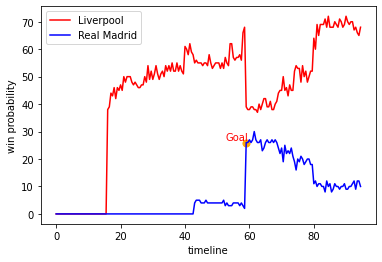

In [204]:
import matplotlib.pyplot as plt

plt.plot(timeline, home_win_prob, color='red', label='Liverpool')
plt.plot(timeline, away_win_prob, color='blue', label='Real Madrid')

x1 = 59
y1 = (away_win_prob[x1*2])
plt.scatter(x=x1, y=y1, color='orange', s=50)
plt.text(x1-3, y1 + 0.1, 'Goal', color='red', ha='center', va='bottom')
plt.xlabel("timeline")
plt.ylabel("win probability")
plt.legend()

In [207]:
df_home[(df_home['Unnamed: 0_level_0','Minute'] <= 20) & (df_home['Unnamed: 0_level_0','Minute'] > 16)]

Unnamed: 0_level_0      Unnamed: 1_level_0 Unnamed: 2_level_0  \
              Minute                  Player              Squad   
3               17.0           Mohamed Salah          Liverpool   
4               19.0  Trent Alexander-Arnold          Liverpool   

  Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0  \
                  xG               PSxG            Outcome           Distance   
3               0.09                0.1              Saved               18.0   
4               0.05                NaN         Off Target               18.0   

  Unnamed: 7_level_0 Unnamed: 8_level_0          SCA 1               \
           Body Part              Notes         Player        Event   
3          Left Foot                NaN     Sadio Mané  Pass (Live)   
4         Right Foot                NaN  Mohamed Salah  Pass (Live)   

              SCA 2              generated simulate  
             Player        Event                     
3  Andrew Robertson  Pass (Live)  0.180613     True  
4        Sadio Mané  Pass (Live)  0.180613    False

In [215]:
timeframe = 5
new_timeline = np.arange(timeframe, 95, 0.5)

home_shot_density = []
away_shot_density = []


df_home = match['Shots'][0].Home[0]
df_away = match['Shots'][0].Away[0]
df_away = df_away.replace('90+2', 92)

df_away['Unnamed: 0_level_0','Minute'] = df_away['Unnamed: 0_level_0','Minute'].astype(float)
for moment in new_timeline:
    print(f'{moment} = moment')
    df1 = df_home[(df_home['Unnamed: 0_level_0','Minute'] <= moment) & (df_home['Unnamed: 0_level_0','Minute'] > moment - timeframe)].copy()
    df2 = df_away[(df_away['Unnamed: 0_level_0','Minute'] <= moment) & (df_away['Unnamed: 0_level_0','Minute'] > moment - timeframe)].copy()
    a = len(df1)
    b = len(df2)
    home_shot_density.append(a)
    away_shot_density.append(b)
    print(f'home prob = {a}%, away prob = {b}%')
    # print(moment, df1)
    
print(len(home_shot_density))
print(len(away_shot_density))
print(len(new_timeline))

5.0 = moment
home prob = 0%, away prob = 0%
5.5 = moment
home prob = 0%, away prob = 0%
6.0 = moment
home prob = 0%, away prob = 0%
6.5 = moment
home prob = 0%, away prob = 0%
7.0 = moment
home prob = 0%, away prob = 0%
7.5 = moment
home prob = 0%, away prob = 0%
8.0 = moment
home prob = 0%, away prob = 0%
8.5 = moment
home prob = 0%, away prob = 0%
9.0 = moment
home prob = 0%, away prob = 0%
9.5 = moment
home prob = 0%, away prob = 0%
10.0 = moment
home prob = 0%, away prob = 0%
10.5 = moment
home prob = 0%, away prob = 0%
11.0 = moment
home prob = 0%, away prob = 0%
11.5 = moment
home prob = 0%, away prob = 0%
12.0 = moment
home prob = 0%, away prob = 0%
12.5 = moment
home prob = 0%, away prob = 0%
13.0 = moment
home prob = 0%, away prob = 0%
13.5 = moment
home prob = 0%, away prob = 0%
14.0 = moment
home prob = 0%, away prob = 0%
14.5 = moment
home prob = 0%, away prob = 0%
15.0 = moment
home prob = 0%, away prob = 0%
15.5 = moment
home prob = 0%, away prob = 0%
16.0 = moment
home p

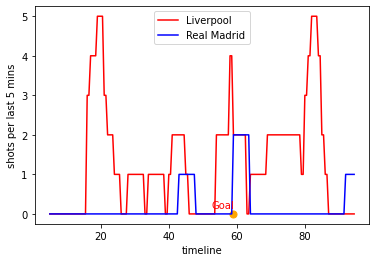

In [217]:
plt.plot(new_timeline, home_shot_density, color='red', label='Liverpool')
plt.plot(new_timeline, away_shot_density, color='blue', label='Real Madrid')

x1 = 59
y1 = (away_shot_density[x1*2])
plt.scatter(x=x1, y=y1, color='orange', s=50)
plt.text(x1-3, y1 + 0.1, 'Goal', color='red', ha='center', va='bottom')
plt.xlabel("timeline")
plt.ylabel("shots per last 5 mins")
plt.legend()

15.0 = moment
home prob = 0%, away prob = 0%
15.5 = moment
home prob = 0%, away prob = 0%
16.0 = moment
home prob = 3%, away prob = 0%
16.5 = moment
home prob = 3%, away prob = 0%
17.0 = moment
home prob = 4%, away prob = 0%
17.5 = moment
home prob = 4%, away prob = 0%
18.0 = moment
home prob = 4%, away prob = 0%
18.5 = moment
home prob = 4%, away prob = 0%
19.0 = moment
home prob = 5%, away prob = 0%
19.5 = moment
home prob = 5%, away prob = 0%
20.0 = moment
home prob = 5%, away prob = 0%
20.5 = moment
home prob = 5%, away prob = 0%
21.0 = moment
home prob = 6%, away prob = 0%
21.5 = moment
home prob = 6%, away prob = 0%
22.0 = moment
home prob = 6%, away prob = 0%
22.5 = moment
home prob = 6%, away prob = 0%
23.0 = moment
home prob = 6%, away prob = 0%
23.5 = moment
home prob = 6%, away prob = 0%
24.0 = moment
home prob = 6%, away prob = 0%
24.5 = moment
home prob = 6%, away prob = 0%
25.0 = moment
home prob = 6%, away prob = 0%
25.5 = moment
home prob = 6%, away prob = 0%
26.0 = mom

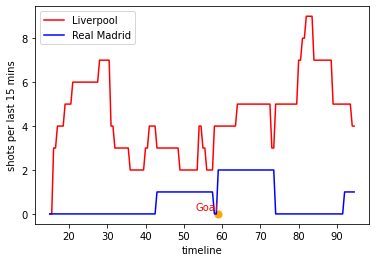

In [218]:
timeframe = 15
new_timeline = np.arange(timeframe, 95, 0.5)

home_shot_density = []
away_shot_density = []


df_home = match['Shots'][0].Home[0]
df_away = match['Shots'][0].Away[0]
df_away = df_away.replace('90+2', 92)

df_away['Unnamed: 0_level_0','Minute'] = df_away['Unnamed: 0_level_0','Minute'].astype(float)
for moment in new_timeline:
    print(f'{moment} = moment')
    df1 = df_home[(df_home['Unnamed: 0_level_0','Minute'] <= moment) & (df_home['Unnamed: 0_level_0','Minute'] > moment - timeframe)].copy()
    df2 = df_away[(df_away['Unnamed: 0_level_0','Minute'] <= moment) & (df_away['Unnamed: 0_level_0','Minute'] > moment - timeframe)].copy()
    a = len(df1)
    b = len(df2)
    home_shot_density.append(a)
    away_shot_density.append(b)
    print(f'home prob = {a}%, away prob = {b}%')
    # print(moment, df1)
    
print(len(home_shot_density))
print(len(away_shot_density))
print(len(new_timeline))

plt.plot(new_timeline, home_shot_density, color='red', label='Liverpool')
plt.plot(new_timeline, away_shot_density, color='blue', label='Real Madrid')

x1 = 59
y1 = (away_shot_density[x1*2])
plt.scatter(x=x1, y=y1, color='orange', s=50)
plt.text(x1-3, y1 + 0.1, 'Goal', color='red', ha='center', va='bottom')
plt.xlabel("timeline")
plt.ylabel("shots per last 15 mins")
plt.legend()

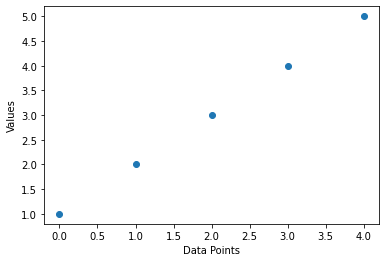

In [210]:
# Assuming you have defined your data array
data = [1, 2, 3, 4, 5]

# Plotting a scatter plot with one axis
plt.plot(data, marker='o', linestyle='')

plt.xlabel('Data Points')  # Add labels as needed
plt.ylabel('Values')

plt.show()

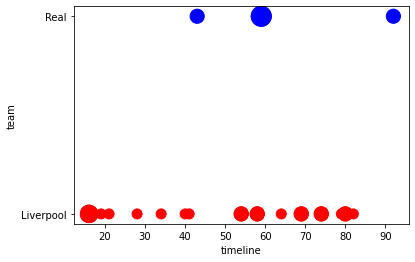

In [237]:
from collections import Counter

df_home_mins = df_home['Unnamed: 0_level_0', 'Minute']
df_away_mins = df_away['Unnamed: 0_level_0', 'Minute']
# zeros_1 = np.zeros(len(df_home_mins))
# zeros_2 = np.zeros(len(df_away_mins))
zeros_1 = np.full( len(df_home_mins), 'Liverpool')
zeros_2 = np.full( len(df_away_mins), 'Real')
weights_1 = [100*i for i in Counter(df_home_mins).values() for j in range(i)]
weights_2 = [200*i for i in Counter(df_away_mins).values() for j in range(i)]

plt.scatter(df_home_mins, zeros_1, s = weights_1, color='r')
plt.scatter(df_away_mins, zeros_2, s = weights_2, color='b')

plt.xlabel('timeline')  # Add labels as needed
plt.ylabel('team')

plt.show()

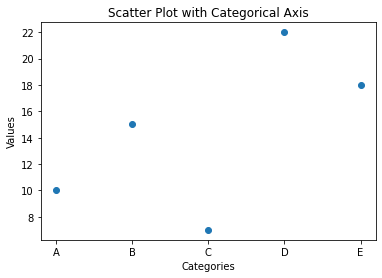

In [228]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['A', 'B', 'C', 'D', 'E']
values = [10, 15, 7, 22, 18]

# Convert categories to numerical values
category_indices = np.arange(len(categories))

# Create a scatter plot
plt.scatter(category_indices, values, marker='o')

# Set the tick locations and labels for the categorical axis
plt.xticks(category_indices, categories)

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Scatter Plot with Categorical Axis')

plt.show()

In [9]:
df_pass_b = match['Away Player Stats'][0]['Passing'][0].drop(match['Away Player Stats'][0]['Passing'][0].index[-1])
df_pass_a = match['Home Player Stats'][0]['Passing'][0].drop(match['Away Player Stats'][0]['Passing'][0].index[-1])
df_pos_b = match['Away Player Stats'][0]['Possession'][0].drop(match['Away Player Stats'][0]['Passing'][0].index[-1])
df_pos_a = match['Home Player Stats'][0]['Possession'][0].drop(match['Away Player Stats'][0]['Passing'][0].index[-1])
#['Unnamed: 24_level_0','1/3']

In [12]:
df_pass_b.columns

MultiIndex([( 'Unnamed: 0_level_0',  'Player'),
            ( 'Unnamed: 1_level_0',       '#'),
            ( 'Unnamed: 2_level_0',  'Nation'),
            ( 'Unnamed: 3_level_0',     'Pos'),
            ( 'Unnamed: 4_level_0',     'Age'),
            ( 'Unnamed: 5_level_0',     'Min'),
            (              'Total',     'Cmp'),
            (              'Total',     'Att'),
            (              'Total',    'Cmp%'),
            (              'Total', 'TotDist'),
            (              'Total', 'PrgDist'),
            (              'Short',     'Cmp'),
            (              'Short',     'Att'),
            (              'Short',    'Cmp%'),
            (             'Medium',     'Cmp'),
            (             'Medium',     'Att'),
            (             'Medium',    'Cmp%'),
            (               'Long',     'Cmp'),
            (               'Long',     'Att'),
            (               'Long',    'Cmp%'),
            ('Unnamed: 20_level_0',     

In [13]:
df_pos_b.columns

MultiIndex([('Unnamed: 0_level_0',  'Player'),
            ('Unnamed: 1_level_0',       '#'),
            ('Unnamed: 2_level_0',  'Nation'),
            ('Unnamed: 3_level_0',     'Pos'),
            ('Unnamed: 4_level_0',     'Age'),
            ('Unnamed: 5_level_0',     'Min'),
            (           'Touches', 'Touches'),
            (           'Touches', 'Def Pen'),
            (           'Touches', 'Def 3rd'),
            (           'Touches', 'Mid 3rd'),
            (           'Touches', 'Att 3rd'),
            (           'Touches', 'Att Pen'),
            (           'Touches',    'Live'),
            (          'Take-Ons',     'Att'),
            (          'Take-Ons',    'Succ'),
            (          'Take-Ons',   'Succ%'),
            (          'Take-Ons',    'Tkld'),
            (          'Take-Ons',   'Tkld%'),
            (           'Carries', 'Carries'),
            (           'Carries', 'TotDist'),
            (           'Carries', 'PrgDist'),
            (

In [23]:
df_pass_b = (df_pass_b.drop(df_pass_b.columns.difference([['Unnamed: 24_level_0','1/3']]), 1))
df_pos_b = (df_pass_b.drop(df_pass_b.columns.difference([[ 'Carries',	'1/3']]), 1))
df_pos_b

/tmp/ipykernel_477958/3158543682.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_pass_b = (df_pass_b.drop(df_pass_b.columns.difference([['Unnamed: 24_level_0','1/3']]), 1))
/tmp/ipykernel_477958/3158543682.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_pos_b = (df_pass_b.drop(df_pass_b.columns.difference([[ 'Carries',	'1/3']]), 1))


0
1
2
3
4
5
6
7
8
9
10


In [20]:
df_away_team = df_away_team.drop(df_away_team.index[-1])
df_away_team

,name
0,Karim Benzema
1,Vinicius Júnior
2,Rodrygo
3,Federico Valverde
4,Eduardo Camavinga
5,Toni Kroos
6,Casemiro
7,Luka Modrić
8,Dani Ceballos
9,Ferland Mendy


In [21]:
print(len(df_pos_b))
print(len(df_away_team))
print(len(df_pass_b))

14
14
14


In [22]:
away_df = pd.DataFrame({
    'name': list(df_away_team.values),
    'pass 1/3': list(df_pass_b.values),
    'carry 1/3': list(df_pos_b.values),

})

away_df

,name,pass 1/3,carry 1/3
0,[Karim Benzema],[3],[]
1,[Vinicius Júnior],[1],[]
2,[Rodrygo],[0],[]
3,[Federico Valverde],[1],[]
4,[Eduardo Camavinga],[0],[]
5,[Toni Kroos],[7],[]
6,[Casemiro],[2],[]
7,[Luka Modrić],[3],[]
8,[Dani Ceballos],[0],[]
9,[Ferland Mendy],[0],[]
